In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn import tree
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# read data
df = pd.read_csv('/content/bike_day.csv')
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


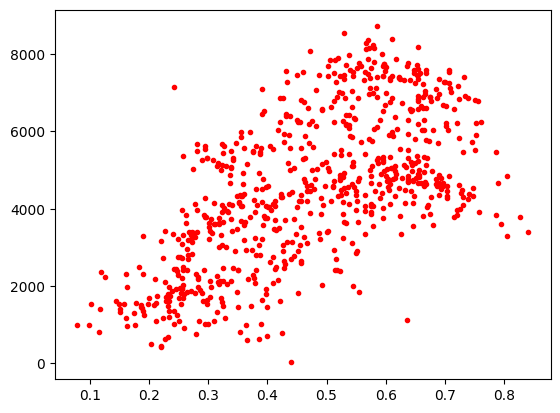

In [ ]:
plt.plot(df.atemp, df.cnt, 'r.')
plt.show()

In [ ]:
X = df[['atemp', 'hum', 'windspeed', 'holiday']]
y = df['cnt']

In [ ]:
# train model
reg = LinearRegression().fit(X, y)

In [ ]:
# intercept and coefficient
reg.intercept_

3805.5128734524214

In [ ]:
reg.coef_

array([ 7485.33193192, -3175.84677485, -4414.78734362,  -585.13568778])

In [ ]:
y_predict = reg.predict(X)
linear_reg_r2 = r2_score(y, y_predict)
linear_reg_r2

0.4657458584321825

## Create a prediction of the number of bikes rented per day where 
atemp=0.5,\
hum=0.3,\
windspeed=0.25 on a working day.

In [ ]:
reg.predict([[0.5, 0.3, 0.25, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4906.59228327])

### Polynomial regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_temp = pd.DataFrame(poly.fit_transform(X[['atemp']]))
X_poly= X[['hum','windspeed','holiday']].join(X_poly_temp)

In [ ]:
X_poly.columns = ['hum','windspeed','holiday','atemp^0','atemp^1','atemp^2']
X_poly

,hum,windspeed,holiday,atemp^0,atemp^1,atemp^2
0,0.805833,0.160446,0,1.0,0.363625,0.132223
1,0.696087,0.248539,0,1.0,0.353739,0.125131
2,0.437273,0.248309,0,1.0,0.189405,0.035874
3,0.590435,0.160296,0,1.0,0.212122,0.044996
4,0.436957,0.186900,0,1.0,0.229270,0.052565
...,...,...,...,...,...,...
726,0.652917,0.350133,0,1.0,0.226642,0.051367
727,0.590000,0.155471,0,1.0,0.255046,0.065048
728,0.752917,0.124383,0,1.0,0.242400,0.058758
729,0.483333,0.350754,0,1.0,0.231700,0.053685


In [ ]:
# train model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)

In [ ]:
y_predict = model.predict(X_poly)
poly_reg_r2 = r2_score(y, y_predict)
poly_reg_r2

0.5454967536250205

### Decision Tree

In [ ]:
model = DecisionTreeRegressor(random_state=111, min_samples_split=20)
model.fit(X,y)

DecisionTreeRegressor(min_samples_split=20, random_state=111)

In [ ]:
y_predict = model.predict(X)
tree_reg_r2 = r2_score(y, y_predict)

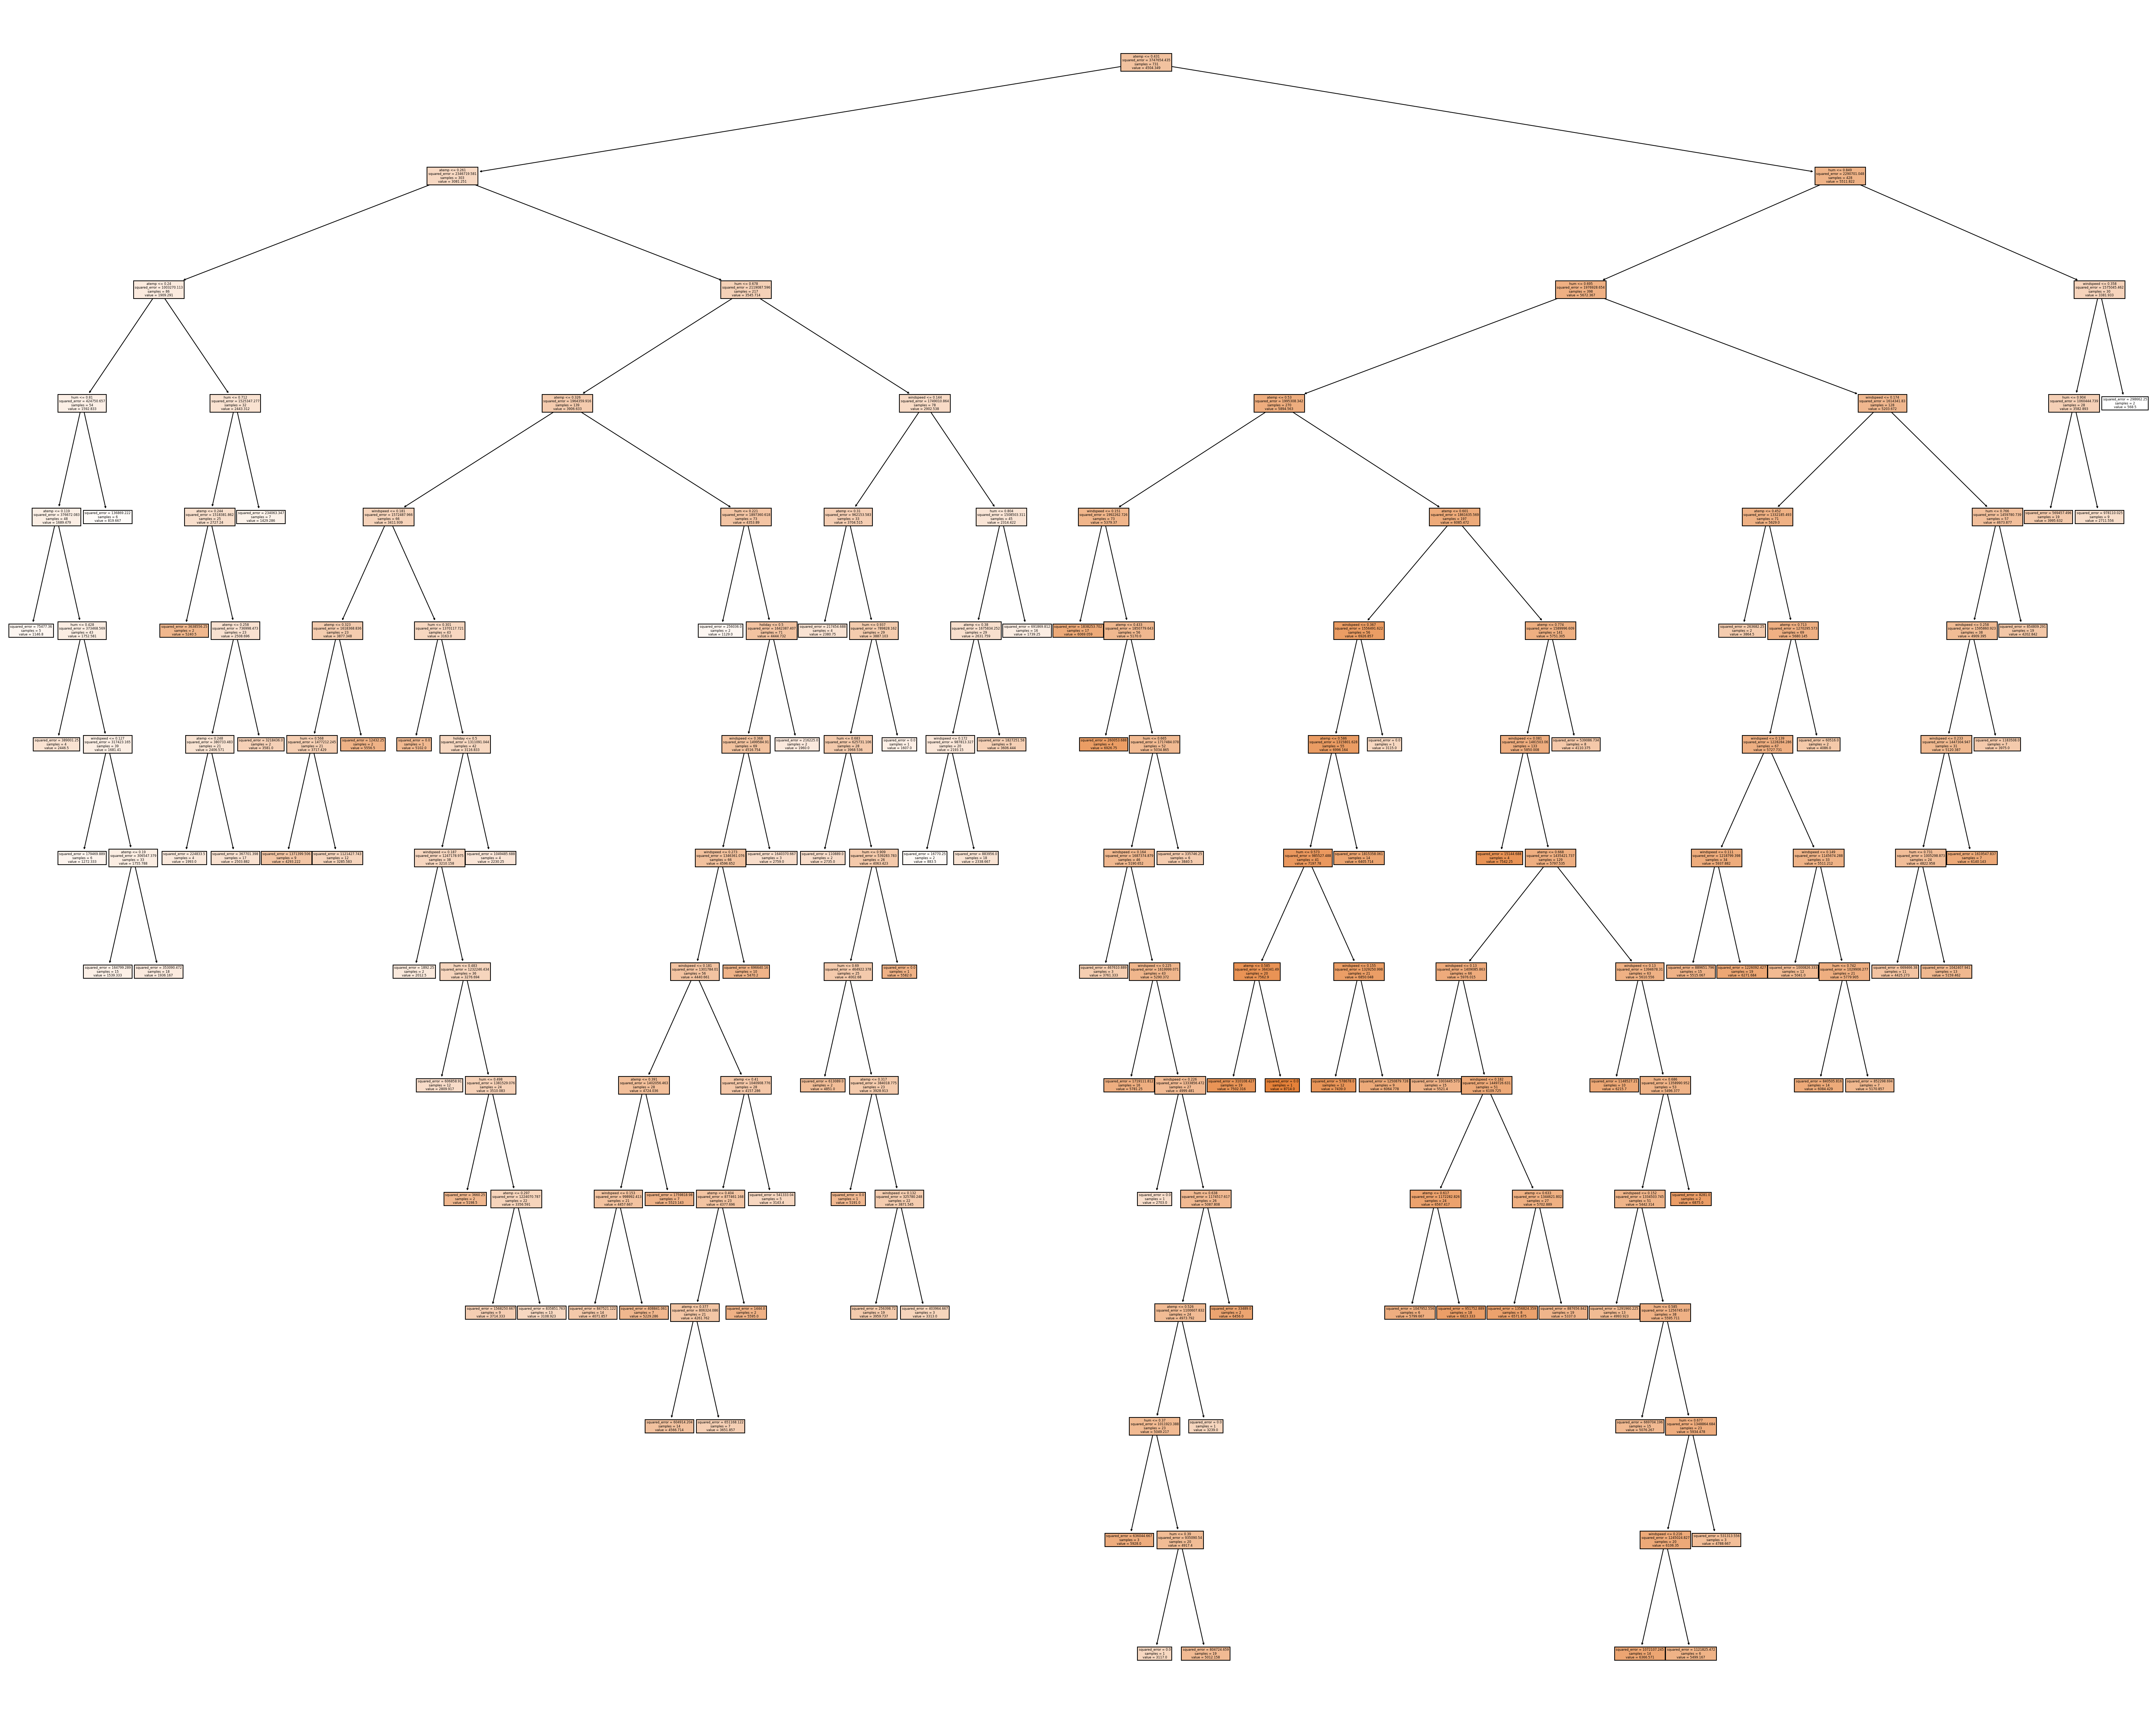

In [ ]:
#Drawing tree
fig = plt.figure(figsize=(50,40), dpi=150)
tree_plot = tree.plot_tree(model, feature_names=X.columns, filled=True)

In [ ]:
print(f"Linear regression R2 score: {linear_reg_r2}. ")
print(f"Polynomial regression R2 score: {poly_reg_r2}. ")
print(f"Decision tree R2 score: {tree_reg_r2}. ")

Linear regression R2 score: 0.4657458584321825. 
Polynomial regression R2 score: 0.5454967536250205. 
Decision tree R2 score: 0.7768989968209719. 


In [ ]:
# Feature Importance
feat_importance = model.tree_.compute_feature_importances(normalize=False)
feat_importance = pd.concat([X.columns.to_series().reset_index(drop=True), pd.Series(feat_importance)], axis=1)
feat_importance = feat_importance.sort_values(feat_importance.columns[1], ascending = False)
feat_importance

,0,1
0,atemp,2.033169e+06
1,hum,5.180038e+05
2,windspeed,3.382406e+05
3,holiday,2.213513e+04


## **Statsmodels** - generating a report about the model

In [ ]:
import statsmodels.api as sm
results = sm.OLS(y,X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              1683.
Date:                Tue, 02 May 2023   Prob (F-statistic):                        0.00
Time:                        23:23:58   Log-Likelihood:                         -6397.9
No. Observations:                 731   AIC:                                  1.280e+04
Df Residuals:                     727   BIC:                                  1.282e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
atemp       9130.7482    318.497     28.668      0.000    8505.464    9756.032
hum           -1.2270    275.176     -0.004      0.996    -541.462     539.008
windspeed    506.0577    597.695      0.847      0.397    -667.357    1679.472
holiday     -412.2320    339.590     -1.214      0.225   -1078.926     254.462
==============================================================================
Omnibus:                        3.678   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.956
Skew:                           0.026   Prob(JB):                        0.228
Kurtosis:                       2.693   Cond. No.                         8.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Splitting data to train and test dataset

In [ ]:
X = df[['atemp','hum','windspeed']]
y = df['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=111, shuffle=False)

In [ ]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(731, 3) (731,)
(584, 3) (584,)
(147, 3) (147,)


In [ ]:
model = DecisionTreeRegressor(random_state=111, min_samples_split=7, max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=7, random_state=111)

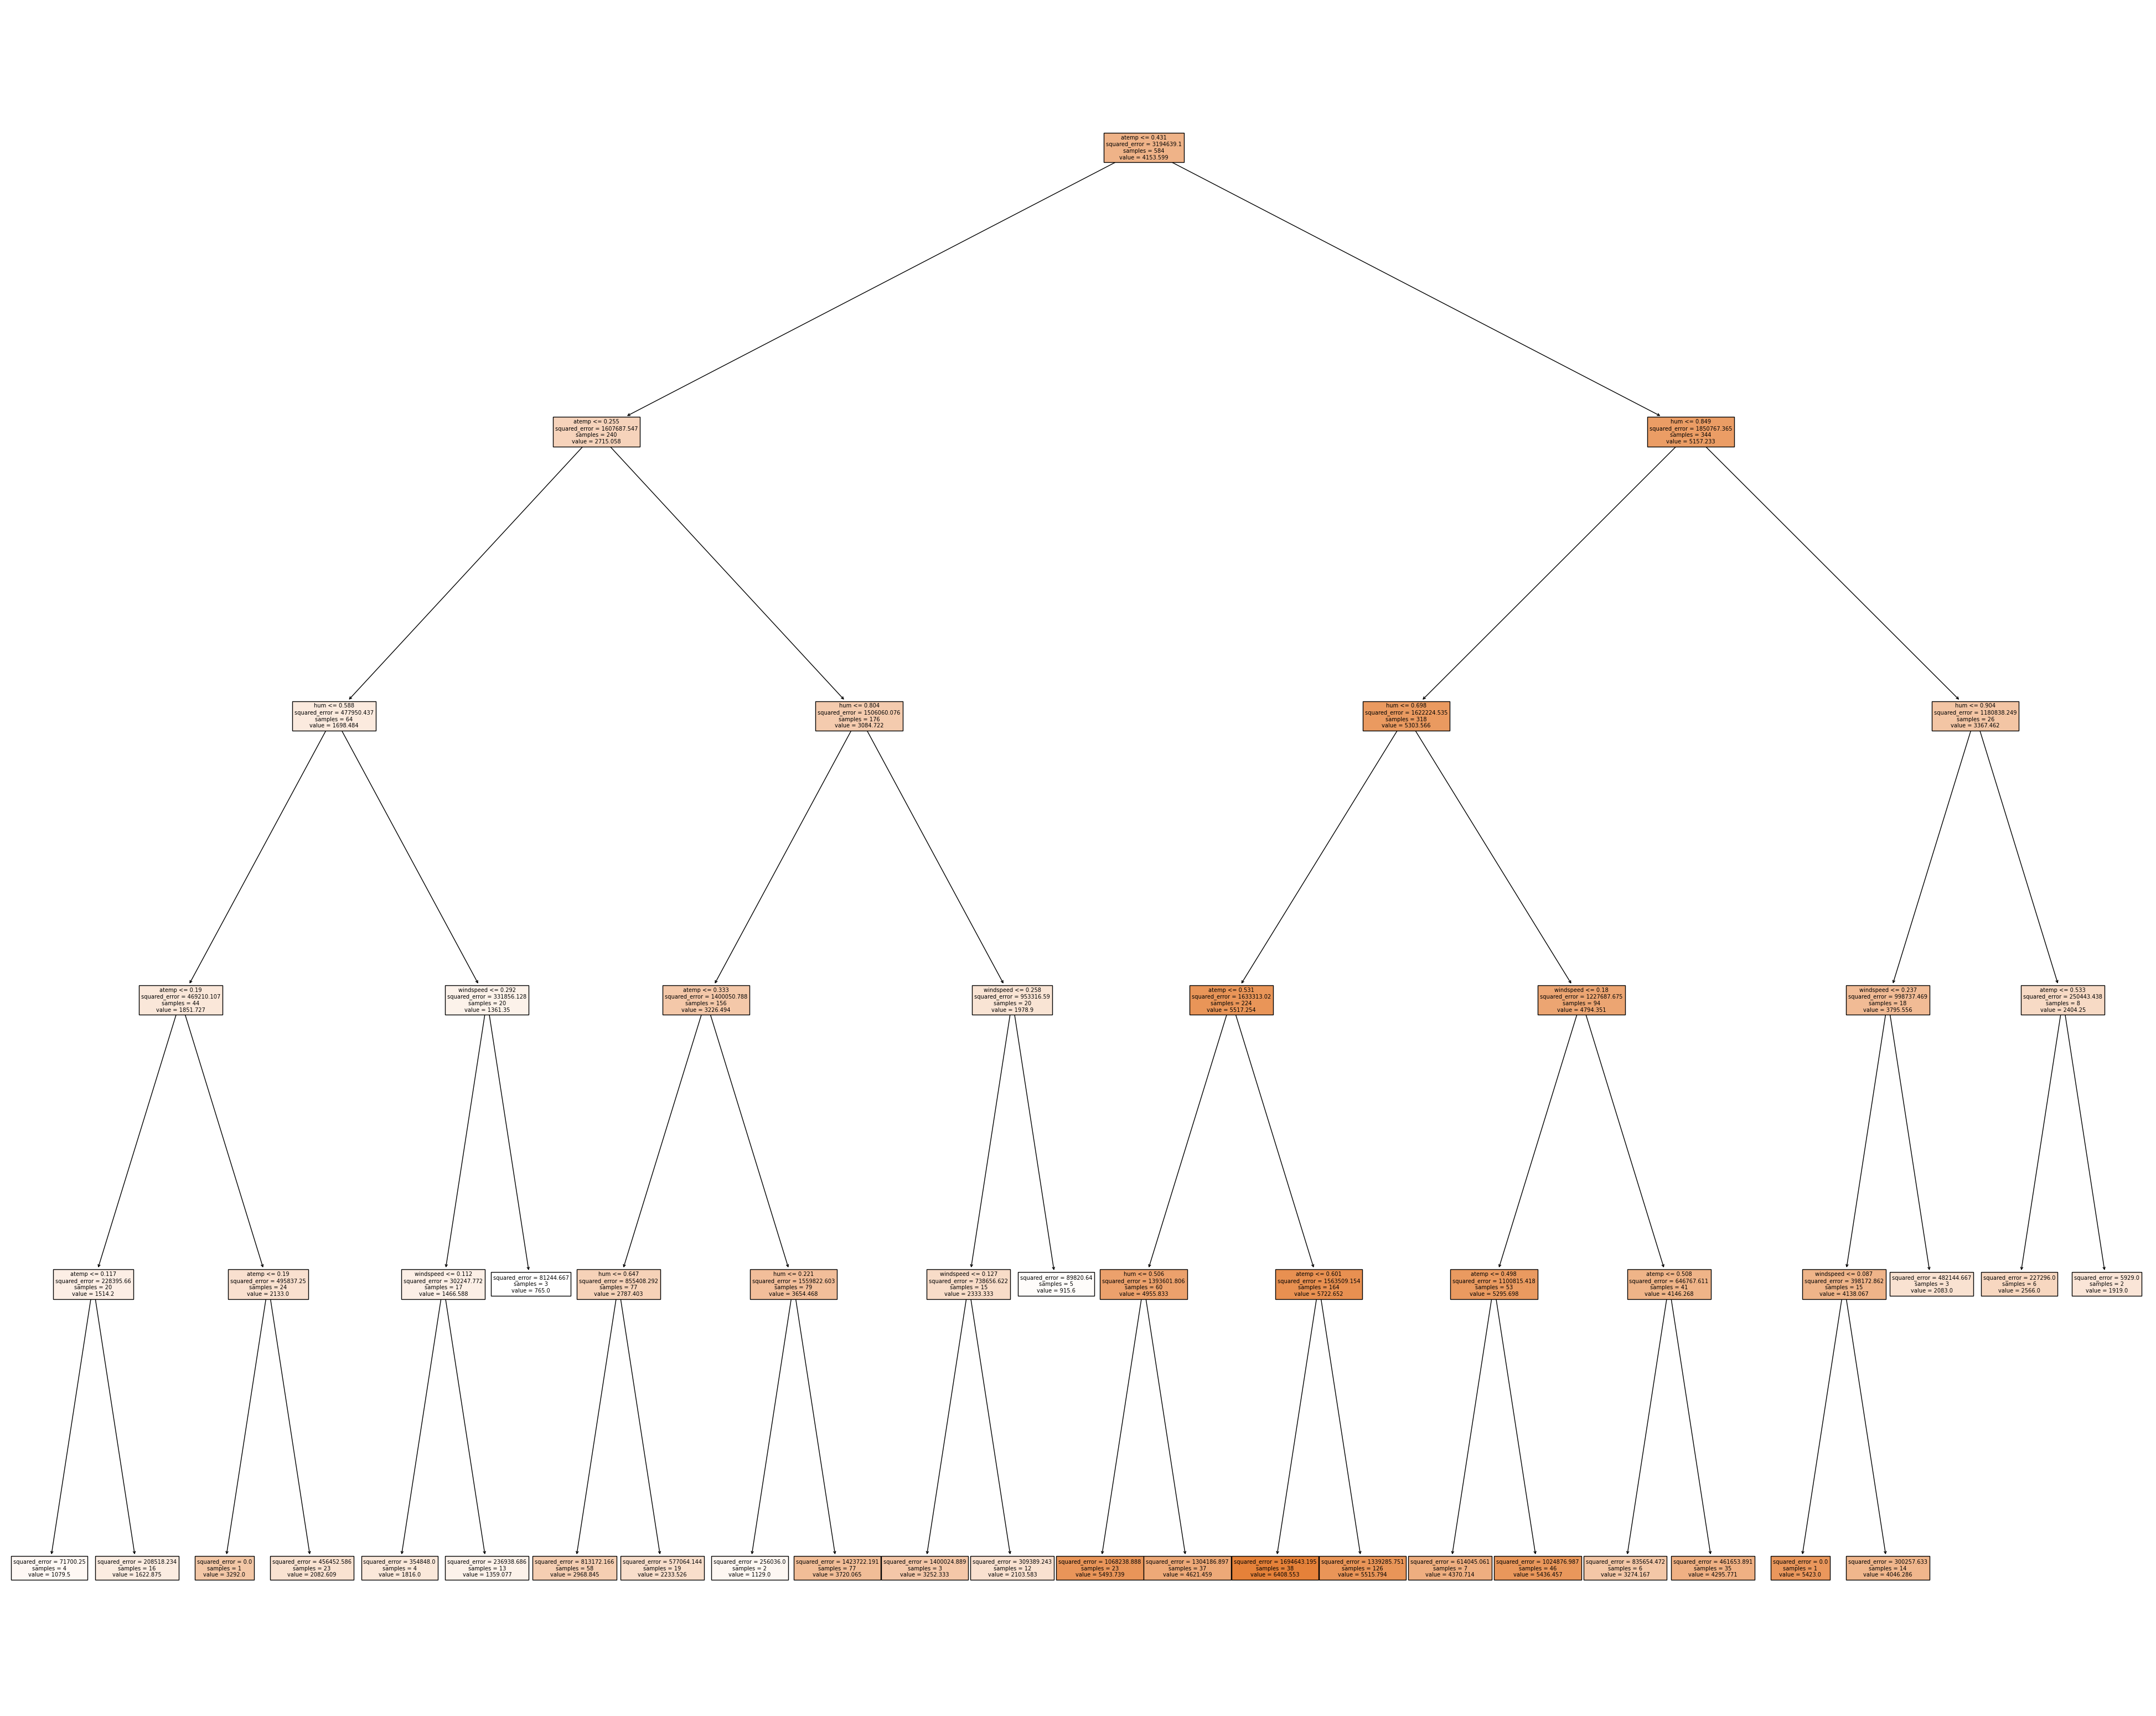

In [ ]:
# Drawing tree
fig = plt.figure(figsize=(50,40), dpi=100)
tree_wykres = tree.plot_tree(model,feature_names=X.columns, filled=True)

In [ ]:
# Checking how our model works on the data it was trained on
y_predict = model.predict(X_train)
print(r2_score(y_train, y_predict))
print(mean_absolute_error(y_train, y_predict))

0.6885275510563696
795.0657389852685


In [ ]:
# Checking how our model works on data it has never seen
y_predict_test = model.predict(X_test)
print(r2_score(y_test, y_predict_test))
print(mean_absolute_error(y_test, y_predict_test))

-0.11111897529639903
1784.1088595455294


### Grid Search

In [ ]:
X = df[['atemp','atemp','hum','windspeed']]
y = df['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=111)

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 60, 10)
                                },
                  cv=10,
                  scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 6, 'min_samples_split': 10}
1100.859291340832


In [ ]:
model = DecisionTreeRegressor(**gs.best_params_)
model

DecisionTreeRegressor(max_depth=6, min_samples_split=10)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=10)

In [ ]:
# Checking how our model works on the data it was trained on
y_predict = model.predict(X_train)
print(r2_score(y_train, y_predict))
print(mean_absolute_error(y_train, y_predict))

0.6864342698496263
863.0478539725037


In [ ]:
# Checking how our model works on data it has never seen
y_predict_test = model.predict(X_test)
print(r2_score(y_test, y_predict_test))
print(mean_absolute_error(y_test, y_predict_test))

0.5180055069648577
1157.1017302713146


### K-times Cross Validation Leave One Out (LOOCV)

In [ ]:
res_GSLOO = GridSearchCV(DecisionTreeRegressor(),
                         param_grid= {'max_depth': range(1, 10),
                                      'min_samples_split': range(10, 60, 10)
                                    },
                         cv=LeaveOneOut(),
                         scoring = 'neg_mean_absolute_error')
res_GSLOO.fit(X_train, y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(res_GSLOO.best_params_)
print(-res_GSLOO.best_score_)

{'max_depth': 6, 'min_samples_split': 40}
1119.559371106317


In [ ]:
model = DecisionTreeRegressor(**res_GSLOO.best_params_)
model

DecisionTreeRegressor(max_depth=6, min_samples_split=40)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=40)

In [ ]:
# Checking how our model works on the data it was trained on
y_predict = model.predict(X_train)
print(r2_score(y_train, y_predict))
print(mean_absolute_error(y_train, y_predict))

0.6235758340970501
945.2486522626995


In [ ]:
# Checking how our model works on data it has never seen
y_predict_test = model.predict(X_test)
print(r2_score(y_test, y_predict_test))
print(mean_absolute_error(y_test, y_predict_test))

0.578038009468983
1075.944294311883
